# I/ Classification

In [1]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits datasets: digits
digits = datasets.load_digits()

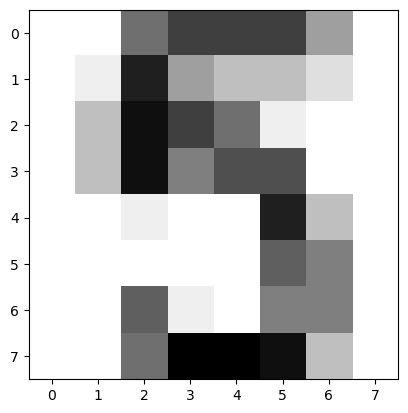

In [2]:
# Display image 1010
plt.imshow(digits.images[1010], cmap = plt.cm.gray_r, interpolation='nearest')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X = digits.data
Y =  digits.target

# Split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify = Y)

In [4]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifier to the training data
knn.fit(X_train, Y_train)

#Print the accuracy
print("Accuracy: {0}".format(knn.score(X_test, Y_test)))

Accuracy: 0.9861111111111112


# Varying Number of Neighbours

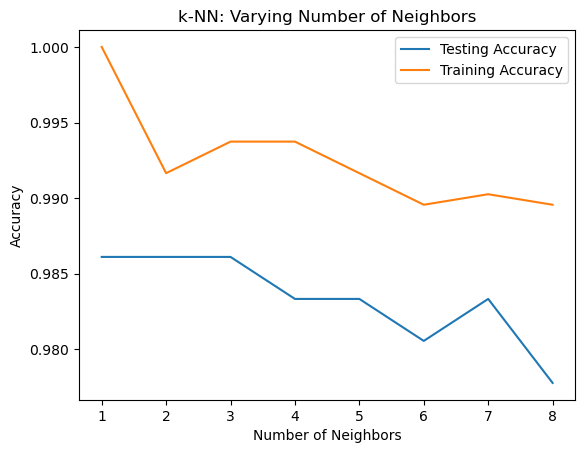

In [5]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    #Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, Y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()   
    

# Classification with deep learning

In [6]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [7]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

In [8]:
print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x186E2E4F250>, 5)


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


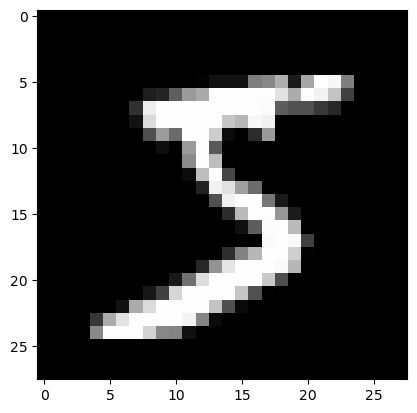

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0], cmap = 'gray')

In [10]:
class Net(nn.Module):
    def __init__ (self):
        super(Net, self) .__init__()
        
        self.fully = nn.Sequential(
        nn.Linear(28*28, 10))
        
    def forward(self, x):
        x = x.view([-1, 28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [11]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train= True, transform=transforms.Compose([transforms.
ToTensor()])), batch_size = 64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train= False, transform=transforms.Compose([transforms.
ToTensor()])), batch_size = 1, shuffle=True)


In [12]:
def train() :
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)
            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print('Epoch = %f.Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))
            
    return net

In [13]:
net = train()

Epoch = 0.000000.Batch = 0. Loss = 2.3388431072235107
Epoch = 0.000000.Batch = 100. Loss = 0.8103896379470825
Epoch = 0.000000.Batch = 200. Loss = 0.575314998626709
Epoch = 0.000000.Batch = 300. Loss = 0.45221513509750366
Epoch = 0.000000.Batch = 400. Loss = 0.5026398301124573
Epoch = 0.000000.Batch = 500. Loss = 0.5788066387176514
Epoch = 0.000000.Batch = 600. Loss = 0.32630491256713867
Epoch = 0.000000.Batch = 700. Loss = 0.4275643229484558
Epoch = 0.000000.Batch = 800. Loss = 0.4236631989479065
Epoch = 0.000000.Batch = 900. Loss = 0.36634403467178345
Epoch = 1.000000.Batch = 0. Loss = 0.30777108669281006
Epoch = 1.000000.Batch = 100. Loss = 0.26450908184051514
Epoch = 1.000000.Batch = 200. Loss = 0.39991551637649536
Epoch = 1.000000.Batch = 300. Loss = 0.30039656162261963
Epoch = 1.000000.Batch = 400. Loss = 0.24057771265506744
Epoch = 1.000000.Batch = 500. Loss = 0.13718681037425995
Epoch = 1.000000.Batch = 600. Loss = 0.30247724056243896
Epoch = 1.000000.Batch = 700. Loss = 0.1744

In [14]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim= True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 10000 9214
Percentage accuracy 92.14


# II. Linear Regression


❖ Load the dataset

In [15]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')


❖ Use seaborn to visualize the data of Gapminder like following image:


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28320\3828785386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


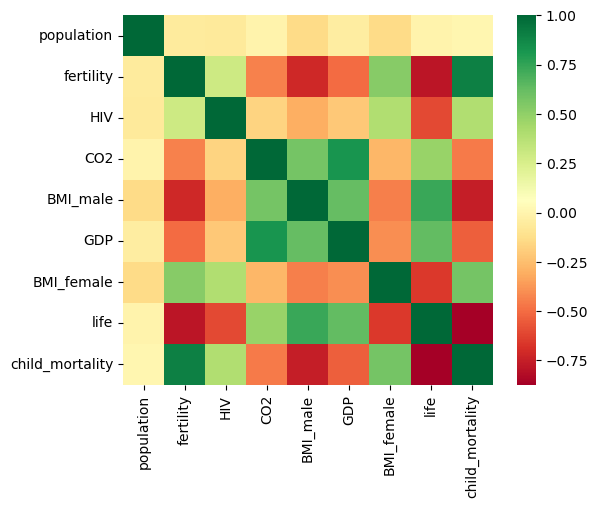

In [16]:
ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

0.6162438752151919


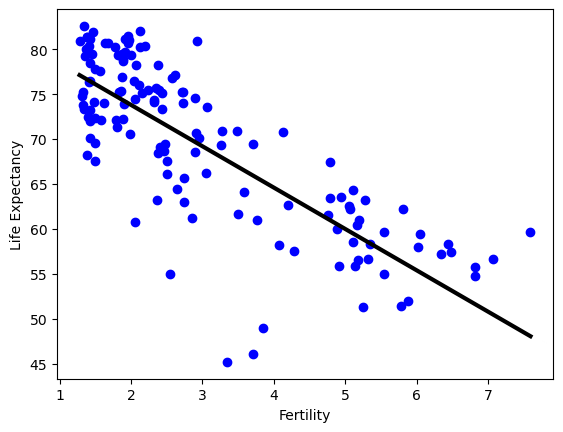

In [17]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size = 0.3, random_state=42)

# Create the regression model: reg_all
reg = LinearRegression()

# Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

# Print accuracy
print(reg.score(x_fertility, y_life))

# Plot regression line
plt.scatter(x_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color = 'black', linewidth = 3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

In [18]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

# Create the regression model: reg_all
reg_all = LinearRegression()

# Fit the regression to the training data
reg_all.fit(x_train, y_train)

# Print accuracy
print(reg_all.score(features, y_life))

0.8914651485793136


# Linear Regression using PyTorch

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

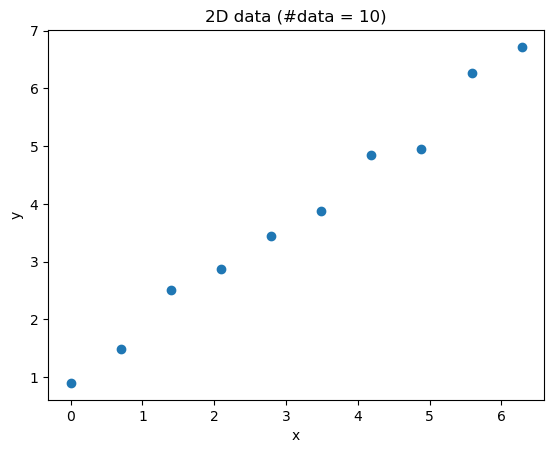

In [20]:
N = 10
m = .9
c = 1
x = np.linspace(0, 2*np.pi, N)
y = m*x + c + np.random.normal(0, .3, x.shape)
plt.figure()
plt.plot(x,y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [21]:
import torch

#  Dataset

In [22]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1, self.x[idx]]),
            'label': torch.tensor([self.y[idx]])}
        return sample

In [23]:
dataset = MyDataset(x,y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([0.8989], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.4860], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.5085], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.8803], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.4387], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([3.8686], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.8510], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([4.9557], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([6.2640], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.7194], dtype=torch.float64)


# DataLoader

In [24]:
from torch.utils.data import DataLoader

dataset = MyDataset(x,y)
batch_size = 4
shuffle = True
num_workers = 0
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [25]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 6.2832],
        [1.0000, 0.6981],
        [1.0000, 4.1888],
        [1.0000, 3.4907]], dtype=torch.float64),
 'label': tensor([[6.7194],
        [1.4860],
        [4.8510],
        [3.8686]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 5.5851],
        [1.0000, 0.0000],
        [1.0000, 2.0944],
        [1.0000, 4.8869]], dtype=torch.float64),
 'label': tensor([[6.2640],
        [0.8989],
        [2.8803],
        [4.9557]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 2.7925],
        [1.0000, 1.3963]], dtype=torch.float64),
 'label': tensor([[3.4387],
        [2.5085]], dtype=torch.float64)}


# Model

In [26]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

# Setting a model for our problem

In [27]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

# Cost Function

 Often called loss or error

In [28]:
cost = nn.MSELoss()

# Minimizing the cost function

In [29]:
num_epochs = 10
l_rate = 0.01

optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 0
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'].float())
        error = cost(predictions, samples['label'].float())
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        optimiser.zero_grad()
        error.backward()
        optimiser.step()
        

Epoch = 0
	Batch = 0, Error = 7.6189727783203125
	Batch = 1, Error = 1.4497904777526855
	Batch = 2, Error = 2.642254114151001
Epoch = 1
	Batch = 0, Error = 0.5393660664558411
	Batch = 1, Error = 0.5571529865264893
	Batch = 2, Error = 0.13097572326660156
Epoch = 2
	Batch = 0, Error = 0.3705514371395111
	Batch = 1, Error = 0.09111568331718445
	Batch = 2, Error = 0.24034884572029114
Epoch = 3
	Batch = 0, Error = 0.35065263509750366
	Batch = 1, Error = 0.08788416534662247
	Batch = 2, Error = 0.14938189089298248
Epoch = 4
	Batch = 0, Error = 0.21997320652008057
	Batch = 1, Error = 0.1412365436553955
	Batch = 2, Error = 0.20696380734443665
Epoch = 5
	Batch = 0, Error = 0.26076939702033997
	Batch = 1, Error = 0.027981938794255257
	Batch = 2, Error = 0.2680385708808899
Epoch = 6
	Batch = 0, Error = 0.06752827763557434
	Batch = 1, Error = 0.23554106056690216
	Batch = 2, Error = 0.19184646010398865
Epoch = 7
	Batch = 0, Error = 0.17231598496437073
	Batch = 1, Error = 0.19982554018497467
	Batch =

# Lets see how well the model has learnt the data

In [30]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


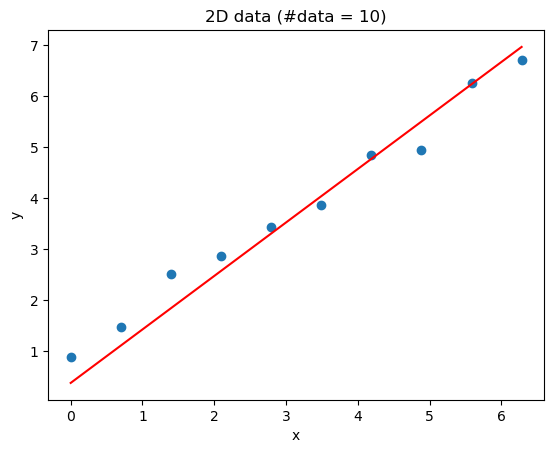

In [31]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

# III. Recommendation Systems 


# Use cosine similarity to compute the missing rating in this table using user-based collaborative filtering (CF)

In [32]:
def user_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis = 1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:, j] - avg_ratings)) / sum(sim_users[i])
    return pred

# ❖ Similarly, computing the missing rating using item-based CF.


In [33]:
def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis = 0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,:] - avg_ratings)) / sum(sim_items[j])
    return pred

# ❖ Compute the predictive accuracy of the above recommendations


In [34]:
def evaluateRS(M, M_result, algorithm, similarity):
    evaluateRS(M, M_result, 'user_cf', 'cosine')
    evaluateRS(M, M_result, 'user_cf', 'correlation')
    evaluateRS(M, M_result, 'item_cf', 'cosine')
    evaluateRS(M, M_result, 'item_cf', 'correlation')
pass

# ❖ Compute the ranking quality of the above recommendations


In [35]:
def evaluateRS(M, M_result, algorithm, similarity):
    evaluateRS(M, M_result, 'user_cf', 'cosine')
    evaluateRS(M, M_result, 'user_cf', 'correlation')
    evaluateRS(M, M_result, 'item_cf', 'cosine')
    evaluateRS(M, M_result, 'item_cf', 'correlation')
pass

In [36]:
def evaluate_rank(M, M_result, method, metric):
    results = []
    for method in ['user_cf', 'item_cf']:
        for metric in ['cosine', 'correlation']:
            rank_acc = evaluate_rank(M, M_result, method, metric)
            results += ["Rank accuracy of {0} with {1} metirc: {2}".format(method[1], metric, rank_acc)]

    print("\n".join(results))
pass

# TODOs in recommendation.ipynb

## 1. Basics of Recommendation Algorithm

#TODO: load dataset into variable M

In [37]:
M = pd.read_csv('data1.csv')

In [38]:
M.head()

,0,1,2,3
0,4.0,3,2.0,3.0
1,1.0,2,3.0,1.0
2,NaN,2,1.0,NaN
3,4.0,3,NaN,NaN


In [39]:
from scipy.spatial.distance import cosine
import sklearn.metrics as metrics
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation, cosine
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
import pandas as pd#TODO: load dataset into variable M

M = pd.read_csv('data1.csv')

M.head()

,0,1,2,3
0,4.0,3,2.0,3.0
1,1.0,2,3.0,1.0
2,NaN,2,1.0,NaN
3,4.0,3,NaN,NaN


### Compute similarities

#### Cosine

In [40]:
import math
import numpy as np

def cosine_similarity(v1, v2, metric='cosine'):
    #metric: cosine or correlation
    if metric == 'correlation':
        v1 = v1 - np.nanmean(v1)
        v2 = v2 - np.nanmean(v2)
    "compute similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]
        y = v2[i]
        if np.isnan(x) or np.isnan(y):
            continue
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

def sim_matrix(M, dimension='user', metric='cosine'):
    N = M.shape[0] if dimension == 'user' else M.shape[1]
    sim = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            if i == j:
                sim[i,j] = 0 #Cancel out the effect of self-similarity in the sums later
                continue
            if dimension == 'user':
                v1, v2 = M[i,:], M[j,:]
            else:
                v1, v2 = M[:,i], M[:,j]
            sim[i][j] = cosine_similarity(v1, v2, metric)
    return sim



In [41]:
M = np.array([[1, 2, 3], [4, np.nan, 6], [7, 8, 9]])
cosine_similarity(M[0, :], M[2, :], 'cosine')

0.9594119455666703

In [42]:
sim_matrix(M, 'user')

array([[0.        , 0.96476382, 0.95941195],
       [0.96476382, 0.        , 0.99733372],
       [0.95941195, 0.99733372, 0.        ]])

In [43]:
sim_matrix(M, 'item')

array([[0.        , 0.99469179, 0.98692754],
       [0.99469179, 0.        , 0.99705449],
       [0.98692754, 0.99705449, 0.        ]])

#### Pearson

In [44]:
cosine_similarity(M[0,:], M[2,:], 'correlation')

1.0

In [45]:
sim_matrix(M, 'user', 'correlation')

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [46]:
sim_matrix(M, 'item', 'correlation')

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

### a) Compute the missing rating in this table using user-based collaborative filtering (CF). (Use cosine similarity, then use Pearson similarity). Assume taking all neighbors

In [47]:
def user_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:, j] - avg_ratings)) / sum(sim_users[i])
    return pred

In [48]:
print("User-based CF (Cosine): \n" + str(pd.DataFrame(user_cf(M, 'cosine'))))
print("User-based CF (Pearson): \n" + str(pd.DataFrame(user_cf(M, 'correlation'))))

User-based CF (Cosine): 
     0    1    2
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0
User-based CF (Pearson): 
     0    1    2
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0


### b) Similarly, computing the missing rating using item-based CF.

In [49]:
def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,:] - avg_ratings)) / sum(sim_items[j])
    return pred

In [50]:
print("Item-based CF (Cosine): \n" + str(pd.DataFrame(item_cf(M, 'cosine'))))
print("Item-based CF (Pearson): \n" + str(pd.DataFrame(item_cf(M, 'correlation'))))

Item-based CF (Cosine): 
     0    1    2
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0
Item-based CF (Pearson): 
     0    1    2
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0


## 2. Evaluating Recommendation Algorithms

### Predictive Accuracy

In [51]:
M_result = np.array([[4,3,2,3], 
                [1,2,3,1],
                [1,2,1,2],
                [4,3,2,4]])
pd.DataFrame(M_result)

,0,1,2,3
0,4,3,2,3
1,1,2,3,1
2,1,2,1,2
3,4,3,2,4


In [52]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt

In [53]:
def evaluateRS(ratings, groundtruth, method='user_cf', metric='cosine'):
    if method == 'user_cf':
        prediction = user_cf(ratings, metric)
    elif method == 'item_cf':
        prediction = item_cf(ratings, metric)
    else:
        raise ValueError('Unsupported method')
    MSE = mean_squared_error(prediction, groundtruth)
    RMSE = round(sqrt(MSE), 3)
    print("RMSE using {0} approach ({1}) is: {2}".format(method, metric, RMSE))
    print(pd.DataFrame(prediction))
    return

In [54]:
# Define the user_cf and item_cf functions
def user_cf(ratings, metric):
    if metric == 'cosine':
        sim_matrix = 1 - pairwise_distances(ratings, metric='cosine')
    elif metric == 'correlation':
        sim_matrix = np.corrcoef(ratings)
    else:
        raise ValueError('Unsupported similarity metric')
    return sim_matrix.dot(ratings) / np.array([np.abs(sim_matrix).sum(axis=1)]).T

def item_cf(ratings, metric):
    if metric == 'cosine':
        sim_matrix = 1 - pairwise_distances(ratings.T, metric='cosine')
    elif metric == 'correlation':
        sim_matrix = np.corrcoef(ratings.T)
    else:
        raise ValueError('Unsupported similarity metric')
    return ratings.dot(sim_matrix) / np.array([np.abs(sim_matrix).sum(axis=1)])

# Create sample ratings and groundtruth matrices
ratings = groundtruth = np.array([[4, 3, 2, 3],
                    [1, 2, 3, 1],
                    [1, 2, 1, 2],
                    [4, 3, 2, 4]])
 # Call the evaluateRS function with the sample inputs
evaluateRS(ratings, groundtruth, method='user_cf', metric='cosine')
evaluateRS(ratings, groundtruth, method='user_cf', metric='correlation')
evaluateRS(ratings, groundtruth, method='item_cf', metric='cosine')
evaluateRS(ratings, groundtruth, method='item_cf', metric='correlation')


RMSE using user_cf approach (cosine) is: 0.973
          0         1         2         3
0  2.610066  2.536689  1.965624  2.589418
1  2.388735  2.462912  2.054257  2.394848
2  2.520241  2.506747  1.950171  2.541046
3  2.612932  2.537644  1.953293  2.599791
RMSE using user_cf approach (correlation) is: 1.983
          0         1         2         3
0  2.424008  1.424008  0.424008  2.054405
1 -2.128108 -1.319282 -0.319282 -1.953335
2  1.188089  1.435732  0.435732  1.811911
3  2.128108  1.319282  0.319282  1.953335
RMSE using item_cf approach (cosine) is: 0.688
          0         1         2         3
0  3.051480  3.004498  2.946052  3.040750
1  1.687653  1.743283  1.823668  1.692941
2  1.513967  1.513112  1.490660  1.523765
3  3.312347  3.256717  3.176332  3.307059
RMSE using item_cf approach (correlation) is: 0.724
          0         1         2         3
0  3.345492  3.345492  0.798735  2.778843
1  1.345492  1.345492  2.038988  0.880685
2  1.654508  1.654508  0.279241  1.406421
3  3

# Thử 

In [55]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Define the true ratings as a pandas DataFrame
true_ratings = pd.DataFrame([[4, 3, 2, 3],
                             [1, 2, 3, 1],
                             [2, 2, 1, 2],
                             [4, 3, 4, 4]])

# Define the predicted ratings for each approach
user_cosine = pd.DataFrame([[4.000000, 3.0, 2.000000, 3.000000],
                             [1.000000, 2.0, 3.000000, 1.000000],
                             [1.794036, 2.0, 1.000000, 1.272355],
                             [4.000000, 3.0, 3.368034, 3.268237]])

user_corr = pd.DataFrame([[4.000000, 3.0, 2.000000, 3.000000],
                             [1.000000, 2.0, 3.000000, 1.000000],
                             [0.764822, 2.0, 1.000000, 1.009169],
                             [4.000000, 3.0, 4.616077, 2.935013]])

item_cosine = pd.DataFrame([[4.00000, 3.0, 2.000000, 3.000000],
                             [1.00000, 2.0, 3.000000, 1.000000],
                             [2.54758, 2.0, 1.000000, 1.537748],
                             [4.00000, 3.0, 2.489861, 2.537748]])

item_corr = pd.DataFrame([[4.000000, 3.0, 2.000000, 3.00000],
                             [1.000000, 2.0, 3.000000, 1.00000],
                             [3.424268, 2.0, 1.000000, 2.16681],
                             [4.000000, 3.0, 2.558482, 3.16681]])

# Compute the RMSE for each approach
rmse_user_cosine = np.sqrt(mean_squared_error(user_cosine, true_ratings))
rmse_user_corr = np.sqrt(mean_squared_error(user_corr, true_ratings))
rmse_item_cosine = np.sqrt(mean_squared_error(item_cosine, true_ratings))
rmse_item_corr = np.sqrt(mean_squared_error(item_corr, true_ratings))

# Print the results
print(f"RMSE using user_cf approach (cosine) is: {rmse_user_cosine:.3f}")
print(user_cosine)
print(f"RMSE using user_cf approach (correlation) is: {rmse_user_corr:.3f}")
print(user_corr)
print(f"RMSE using item_cf approach (cosine) is: {rmse_item_cosine:.3f}")
print(item_cosine)
print(f"RMSE using item_cf approach (correlation) is: {rmse_item_corr:.3f}")
print(item_corr)


RMSE using user_cf approach (cosine) is: 0.307
          0    1         2         3
0  4.000000  3.0  2.000000  3.000000
1  1.000000  2.0  3.000000  1.000000
2  1.794036  2.0  1.000000  1.272355
3  4.000000  3.0  3.368034  3.268237
RMSE using user_cf approach (correlation) is: 0.501
          0    1         2         3
0  4.000000  3.0  2.000000  3.000000
1  1.000000  2.0  3.000000  1.000000
2  0.764822  2.0  1.000000  1.009169
3  4.000000  3.0  4.616077  2.935013
RMSE using item_cf approach (cosine) is: 0.555
         0    1         2         3
0  4.00000  3.0  2.000000  3.000000
1  1.00000  2.0  3.000000  1.000000
2  2.54758  2.0  1.000000  1.537748
3  4.00000  3.0  2.489861  2.537748
RMSE using item_cf approach (correlation) is: 0.549
          0    1         2        3
0  4.000000  3.0  2.000000  3.00000
1  1.000000  2.0  3.000000  1.00000
2  3.424268  2.0  1.000000  2.16681
3  4.000000  3.0  2.558482  3.16681


### Ranking Accuracy

In [56]:
import numpy as np
import scipy.stats as stats

def evaluate_rank(ratings, groundtruth, method='user_cf', metric='cosine'):
    #metric: cosine vs correlation
    if method == 'user_cf':
        prediction = user_cf(ratings, metric)
    else:
        prediction = item_cf(ratings, metric)
    
    avg_tau = 0
    n_users = ratings.shape[0]  # define n_users here
    for i in range(n_users):
        tau, p_value = stats.kendalltau(groundtruth[i,:], prediction[i,:])  # replace M_result with groundtruth
        avg_tau += tau
    avg_tau = avg_tau / n_users
    return avg_tau

ratings = groundtruth = np.array([[4, 3, 2, 3],
                                   [1, 2, 3, 1],
                                   [1, 2, 1, 2],
                                   [4, 3, 2, 4]])
results = []
for method in ['user_cf', 'item_cf']:
    for metric in ['cosine', 'correlation']:
        rank_acc = evaluate_rank(ratings, groundtruth, method, metric)
        results += ["Rank accuracy of {0} with {1} metric: {2}".format(method[1], metric, rank_acc)]

print("\n".join(results))


Rank accuracy of s with cosine metric: 0.5128539907448404
Rank accuracy of s with correlation metric: 0.8887773421133893
Rank accuracy of t with cosine metric: 0.7867152694974235
Rank accuracy of t with correlation metric: 0.584119431731314
